In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
# read the catapult and vivado csv files first and then 
# process data and make comparisons

cHistdf = pd.read_csv("./catapult_histogram.csv", index_col=0)
vHistdf = pd.read_csv("./final_result_impl_histogram.csv", index_col=0)

# cHist cutting out unneccesary optimizations
#cHistdf = cHistdf[(cHistdf['knob_I_B'] == 0)]
# removing interleave optimizations
#cHistdf = cHistdf[(cHistdf['knob_KNOB_DATA_BLOCK_INTERLEAVE'] > 1000)]
cHistdf = cHistdf.drop(columns=['knob_I_B'])
cHistdf['nTput'] = (1/cHistdf['obj1'])/(1/cHistdf['obj1'].min())
cHistdf['resRatio'] = cHistdf['obj2']/147780
cHistdf['1/obj2'] = (1/cHistdf['obj2'])/(1/cHistdf['obj2'].min())
print(cHistdf.count())
# get common columns 
cmn_col = np.intersect1d(cHistdf.columns, vHistdf.columns)
print("\ncommon columns: ", cmn_col)

#vivHistdf cutting out unneccesary optimizations
vHistdf = vHistdf[(vHistdf['knob_SIMD']==1)]
vHistdf = vHistdf[(vHistdf['knob_COMPUTE_UNITS']==1)]
vHistdf = vHistdf[(vHistdf['knob_ACCUM_SMEM']==0)]
vHistdf = vHistdf[(vHistdf['knob_PIPE_FACTOR']==0)]
vHistdf['1/obj2'] = (1/vHistdf['obj2'])/(1/vHistdf['obj2'].min())
print("Vivado Histogram minimum latency:", vHistdf['obj1'].min())
vHistdf['nTput'] = (1/vHistdf['obj1'])/(1/vHistdf['obj1'].min())
vHistdf['resRatio'] = vHistdf['obj2']/147780
print(vHistdf.count())

knob_HIST_SIZE                     1936
knob_NUM_HIST                      1936
knob_KNOB_UNROLL_LLM               1936
knob_UNROLL_FACTOR                 1936
knob_KNOB_DATA_BLOCK_INTERLEAVE    1936
obj1                               1936
obj2                               1936
nTput                              1936
resRatio                           1936
1/obj2                             1936
dtype: int64

common columns:  ['knob_HIST_SIZE' 'knob_NUM_HIST' 'knob_UNROLL_FACTOR' 'obj1' 'obj2']
Vivado Histogram minimum latency: 4.4e-05
knob_NUM_HIST           1004
knob_HIST_SIZE          1004
knob_NUM_WORK_ITEMS     1004
knob_NUM_WORK_GROUPS    1004
knob_SIMD               1004
knob_COMPUTE_UNITS      1004
knob_ACCUM_SMEM         1004
knob_UNROLL_FACTOR      1004
knob_PIPE_FACTOR        1004
obj1                    1004
obj2                    1004
1/obj2                  1004
nTput                   1004
resRatio                1004
dtype: int64


Text(0, 0.5, 'Normalized CLB (1/CLB) Utilization')

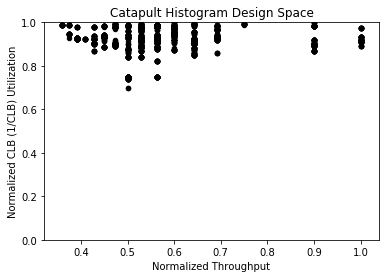

In [2]:
ax = cHistdf.plot(x='nTput', y='1/obj2', kind='scatter', c='black')
#ax.set_xlim(0.0005, 0.0027)
ax.set_ylim(0.0000, 1)
plt.title("Catapult Histogram Design Space")
plt.xlabel("Normalized Throughput")
plt.ylabel("Normalized CLB (1/CLB) Utilization")

Text(0, 0.5, 'Normalized CLB (1/CLB) Utilization')

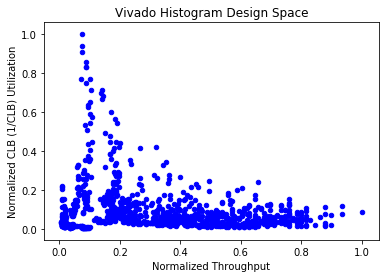

In [3]:
ax = vHistdf.plot(x='nTput', y='1/obj2', kind='scatter', c='blue')
#ax.set_xlim(0.0005, 0.0027)
#ax.set_ylim(0, 1)
plt.title("Vivado Histogram Design Space")
plt.xlabel("Normalized Throughput")
plt.ylabel("Normalized CLB (1/CLB) Utilization")

Text(0.5, 0, 'Latency')

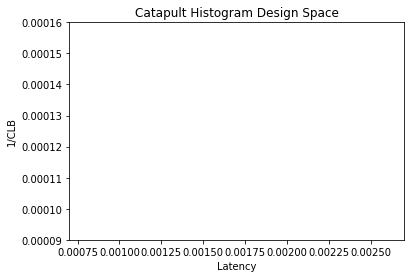

In [4]:
ax2 = cHistdf.plot(x='obj1', y='1/obj2', kind='scatter')
ax2.set_xlim(0.0007, 0.0027)
ax2.set_ylim(0.00009, 0.00016)
plt.title("Catapult Histogram Design Space")
plt.ylabel("1/CLB")
plt.xlabel("Latency")

Text(0.5, 0, 'Latency')

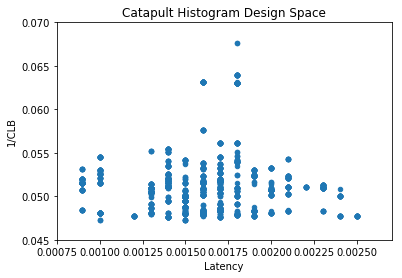

In [5]:
ax2 = cHistdf.plot(x='obj1', y='resRatio', kind='scatter')
ax2.set_xlim(0.00075, 0.0027)
ax2.set_ylim(0.045,0.07)
plt.title("Catapult Histogram Design Space")
plt.ylabel("1/CLB")
plt.xlabel("Latency")

(0, 0.035)

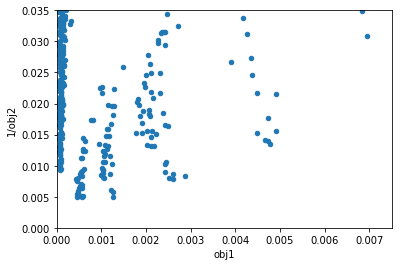

In [6]:
vivax = vHistdf.plot(x='obj1', y='1/obj2', kind='scatter')
vivax.set_xlim(0, 0.0075)
vivax.set_ylim(0,0.035)

(0, 0.045)

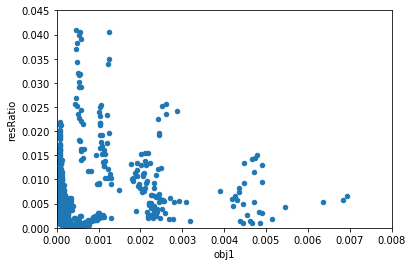

In [7]:
vivax2 = vHistdf.plot(x='obj1', y='resRatio', kind='scatter')
vivax2.set_xlim(0, 0.008)
vivax2.set_ylim(0, 0.045)

In [8]:
print("--------------Vivado Histogram Averages--------------")
print(vHistdf.mean())
print("--------------Catapult Histogram Averages--------------")
print(cHistdf.mean())

--------------Vivado Histogram Averages--------------
knob_NUM_HIST             3.903386
knob_HIST_SIZE          256.000000
knob_NUM_WORK_ITEMS       3.295817
knob_NUM_WORK_GROUPS      3.275896
knob_SIMD                 1.000000
knob_COMPUTE_UNITS        1.000000
knob_ACCUM_SMEM           0.000000
knob_UNROLL_FACTOR        7.763944
knob_PIPE_FACTOR          0.000000
obj1                      0.000550
obj2                    839.389442
1/obj2                    0.097881
nTput                     0.314797
resRatio                  0.005680
dtype: float64
--------------Catapult Histogram Averages--------------
knob_HIST_SIZE                       256.000000
knob_NUM_HIST                          7.834194
knob_KNOB_UNROLL_LLM                   3.912707
knob_UNROLL_FACTOR                     1.971591
knob_KNOB_DATA_BLOCK_INTERLEAVE    17081.913740
obj1                                   0.001602
obj2                                7566.791839
nTput                                  0.591009
r

In [33]:
csobelx = pd.read_csv("./catapult_sobelx_latency.csv", index_col=0)
vsobelx = pd.read_csv("./final_result_impl_sobelx_new.csv", index_col=0)
csobelx['throughput'] = vsobelx['obj1'].min()*1/csobelx['obj1']
vsobelx['throughput'] = vsobelx['obj1'].min()*1/vsobelx['obj1']
csobelx['ff_inv'] = 1/csobelx['ff']
vsobelx['ff_inv'] = 1/vsobelx['ff']
csobelx['lut_inv'] = 1/csobelx['lut']
vsobelx['lut_inv'] = 1/vsobelx['lut']
csobelx['1/obj2'] = (1/(csobelx['obj2']))/(1/vsobelx['obj2'].min())
vsobelx['1/obj2'] = (1/(vsobelx['obj2']))/(1/vsobelx['obj2'].min())
csobelx['clbUtil'] = csobelx['obj2']/147780
vsobelx['clbUtil'] = vsobelx['obj2']/147780
csobelx['mem_partition_size'] = csobelx['knob_dimx_part_factor']
vsobelx['mem_partition_size'] = pd.to_numeric(2073600/(vsobelx['knob_dimx_part_factor']*vsobelx['knob_dimy_part_factor']), downcast='integer')
csobelx = csobelx.drop(columns=['knob_I_B'])
csobelx = csobelx.drop(columns=['knob_dimx_part_factor'])
vsobelx = vsobelx.drop(columns=['knob_dimx_part_factor'])
vsobelx = vsobelx.drop(columns=['knob_dimy_part_factor'])

In [34]:
print(csobelx.count())
csobelx.head()

knob_unroll_factor    480
knob_subdim_x         480
obj1                  480
obj2                  480
lut                   480
ff                    480
dsp                   480
bram                  480
throughput            480
ff_inv                480
lut_inv               480
1/obj2                480
clbUtil               480
mem_partition_size    480
dtype: int64


,knob_unroll_factor,knob_subdim_x,obj1,obj2,lut,ff,dsp,bram,throughput,ff_inv,lut_inv,1/obj2,clbUtil,mem_partition_size
n,,,,,,,,,,,,,,
0,1,1,0.4579,113,696,259,1,0,0.034942,0.003861,0.001437,0.601770,0.000765,2073600
1,1,2,0.2802,121,694,240,1,0,0.057102,0.004167,0.001441,0.561983,0.000819,2073600
2,1,4,0.2748,118,751,217,1,0,0.058224,0.004608,0.001332,0.576271,0.000798,2073600
3,1,8,0.2460,112,688,218,1,0,0.065041,0.004587,0.001453,0.607143,0.000758,2073600
4,1,16,0.2193,107,666,219,1,0,0.072959,0.004566,0.001502,0.635514,0.000724,2073600


In [35]:
print(vsobelx.count())
vsobelx.head()

knob_unroll_factor    765
knob_subdim_x         765
obj1                  765
obj2                  765
lut                   765
ff                    765
dsp                   765
bram                  765
throughput            765
ff_inv                765
lut_inv               765
1/obj2                765
clbUtil               765
mem_partition_size    765
dtype: int64


,knob_unroll_factor,knob_subdim_x,obj1,obj2,lut,ff,dsp,bram,throughput,ff_inv,lut_inv,1/obj2,clbUtil,mem_partition_size
n,,,,,,,,,,,,,,
0,1,1,0.383,68,291,272,3,1,0.041775,0.003676,0.003436,1.000000,0.000460,2073600
1,1,2,0.080,197,972,660,8,0,0.200000,0.001515,0.001029,0.345178,0.001333,2073600
2,1,4,0.046,197,887,649,8,0,0.347826,0.001541,0.001127,0.345178,0.001333,2073600
3,1,8,0.029,170,855,649,8,0,0.551724,0.001541,0.001170,0.400000,0.001150,2073600
4,1,16,0.020,166,840,649,8,0,0.800000,0.001541,0.001190,0.409639,0.001123,2073600


In [36]:
cmn_col = np.intersect1d(csobelx.columns, vsobelx.columns)

(0.0, 0.015)

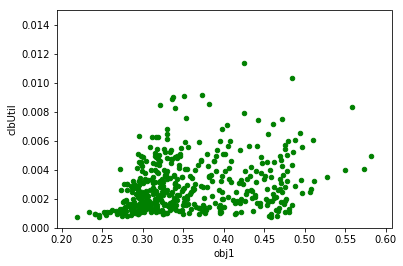

In [37]:
ax = csobelx.plot(x='obj1', y='clbUtil', kind='scatter', c='g')
ax.set_ylim(0.0,0.015)

(0, 0.031)

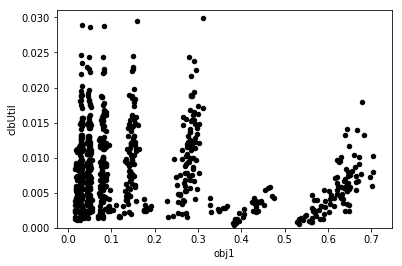

In [38]:
ax = vsobelx.plot(x='obj1', y='clbUtil', kind='scatter', c='black')
ax.set_ylim(0,0.031)

Text(0, 0.5, 'CLB Resource Utilization')

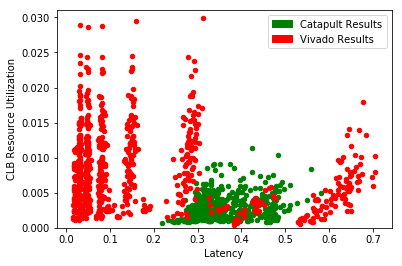

In [39]:
ax1 = csobelx.plot(x='obj1', y='clbUtil', kind='scatter', c='g')
ax = vsobelx.plot(x='obj1', y='clbUtil', kind='scatter', c='r', ax=ax1)
ax1.set_ylim(0,0.031)

red_data = mpatches.Patch(color='green', label='Catapult Results')
green_data = mpatches.Patch(color='red', label='Vivado Results')
plt.legend(handles=[red_data, green_data])
plt.xlabel('Latency')
plt.ylabel('CLB Resource Utilization')

Text(0, 0.5, 'FF Resources (1/FF)')

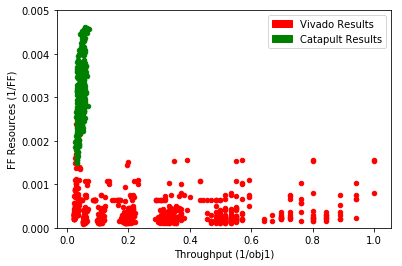

In [40]:
ax1 = vsobelx.plot(x='throughput', y='ff_inv', kind='scatter', c='r')
ax = csobelx.plot(x='throughput', y='ff_inv', kind='scatter', c='g', ax=ax1)
ax1.set_ylim(0,0.005)

red_data = mpatches.Patch(color='red', label='Vivado Results')
green_data = mpatches.Patch(color='green', label='Catapult Results')
plt.legend(handles=[red_data, green_data])
plt.xlabel('Throughput (1/obj1)')
plt.ylabel('FF Resources (1/FF)')

Text(0, 0.5, 'LUT Resources (1/LUT)')

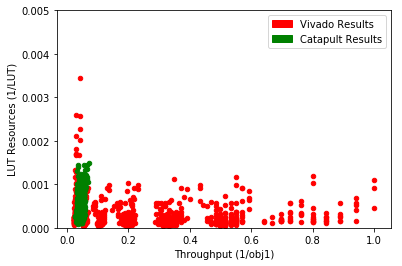

In [41]:
ax1 = vsobelx.plot(x='throughput', y='lut_inv', kind='scatter', c='r')
ax = csobelx.plot(x='throughput', y='lut_inv', kind='scatter', c='g', ax=ax1)
ax1.set_ylim(0,0.005)

red_data = mpatches.Patch(color='red', label='Vivado Results')
green_data = mpatches.Patch(color='green', label='Catapult Results')
plt.legend(handles=[red_data, green_data])
plt.xlabel('Throughput (1/obj1)')
plt.ylabel('LUT Resources (1/LUT)')

Text(0, 0.5, 'CLB Resources (Normalized 1/CLB)')

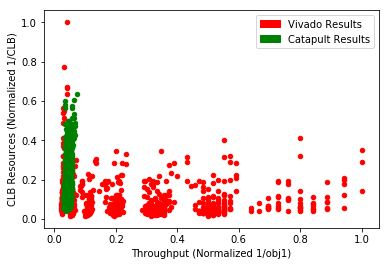

In [42]:
ax1 = vsobelx.plot(x='throughput', y='1/obj2', kind='scatter', c='r')
ax = csobelx.plot(x='throughput', y='1/obj2', kind='scatter', c='g', ax=ax1)
#ax1.set_ylim(0,0.016)

red_data = mpatches.Patch(color='red', label='Vivado Results')
green_data = mpatches.Patch(color='green', label='Catapult Results')
plt.legend(handles=[red_data, green_data])
plt.xlabel('Throughput (Normalized 1/obj1)')
plt.ylabel('CLB Resources (Normalized 1/CLB)')

Text(0, 0.5, 'Normalized 1/CLB (1/obj2)')

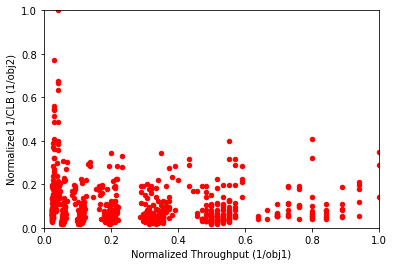

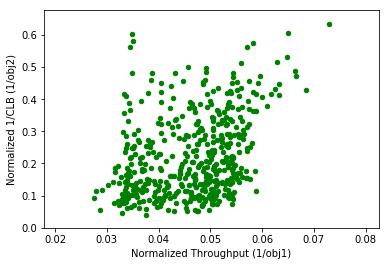

In [43]:
ax1 = vsobelx.plot(y='1/obj2', x='throughput', kind='scatter', c='r')
plt.xlabel('Normalized Throughput (1/obj1)')
plt.ylabel('Normalized 1/CLB (1/obj2)')
ax = csobelx.plot(y='1/obj2', x='throughput', kind='scatter', c='g')
ax1.set_ylim(0,1)
ax1.set_xlim(0,1)
#ax.set_ylim(0.0, 0.0006)
#red_data = mpatches.Patch(color='green', label='Vivado Results')
#green_data = mpatches.Patch(color='red', label='Catapult Results')
#plt.legend(handles=[red_data, green_data])
plt.xlabel('Normalized Throughput (1/obj1)')
plt.ylabel('Normalized 1/CLB (1/obj2)')

In [44]:
csobelx = csobelx.reset_index(drop=True)
vsobelx = vsobelx.reset_index(drop=True)
cv_sobel = pd.merge(csobelx, vsobelx, on=['knob_unroll_factor','mem_partition_size', 'knob_subdim_x'], how='inner')
cv_sobel.count()

knob_unroll_factor    624
knob_subdim_x         624
obj1_x                624
obj2_x                624
lut_x                 624
ff_x                  624
dsp_x                 624
bram_x                624
throughput_x          624
ff_inv_x              624
lut_inv_x             624
1/obj2_x              624
clbUtil_x             624
mem_partition_size    624
obj1_y                624
obj2_y                624
lut_y                 624
ff_y                  624
dsp_y                 624
bram_y                624
throughput_y          624
ff_inv_y              624
lut_inv_y             624
1/obj2_y              624
clbUtil_y             624
dtype: int64

In [45]:
print(cv_sobel.count())
cv_sobel.head()

knob_unroll_factor    624
knob_subdim_x         624
obj1_x                624
obj2_x                624
lut_x                 624
ff_x                  624
dsp_x                 624
bram_x                624
throughput_x          624
ff_inv_x              624
lut_inv_x             624
1/obj2_x              624
clbUtil_x             624
mem_partition_size    624
obj1_y                624
obj2_y                624
lut_y                 624
ff_y                  624
dsp_y                 624
bram_y                624
throughput_y          624
ff_inv_y              624
lut_inv_y             624
1/obj2_y              624
clbUtil_y             624
dtype: int64


,knob_unroll_factor,knob_subdim_x,obj1_x,obj2_x,lut_x,ff_x,dsp_x,bram_x,throughput_x,ff_inv_x,...,obj2_y,lut_y,ff_y,dsp_y,bram_y,throughput_y,ff_inv_y,lut_inv_y,1/obj2_y,clbUtil_y
0,1,1,0.4579,113,696,259,1,0,0.034942,0.003861,...,68,291,272,3,1,0.041775,0.003676,0.003436,1.000000,0.000460
1,1,2,0.2802,121,694,240,1,0,0.057102,0.004167,...,197,972,660,8,0,0.200000,0.001515,0.001029,0.345178,0.001333
2,1,4,0.2748,118,751,217,1,0,0.058224,0.004608,...,197,887,649,8,0,0.347826,0.001541,0.001127,0.345178,0.001333
3,1,8,0.2460,112,688,218,1,0,0.065041,0.004587,...,170,855,649,8,0,0.551724,0.001541,0.001170,0.400000,0.001150
4,1,16,0.2193,107,666,219,1,0,0.072959,0.004566,...,166,840,649,8,0,0.800000,0.001541,0.001190,0.409639,0.001123


In [46]:
sobel_sample = cv_sobel.sample(30)
sobel_sample.head()

,knob_unroll_factor,knob_subdim_x,obj1_x,obj2_x,lut_x,ff_x,dsp_x,bram_x,throughput_x,ff_inv_x,...,obj2_y,lut_y,ff_y,dsp_y,bram_y,throughput_y,ff_inv_y,lut_inv_y,1/obj2_y,clbUtil_y
183,3,2,0.3787,182,1195,338,1,0,0.042250,0.002959,...,880,4006,3316,36,0,0.059041,0.000302,0.000250,0.077273,0.005955
0,1,1,0.4579,113,696,259,1,0,0.034942,0.003861,...,68,291,272,3,1,0.041775,0.003676,0.003436,1.000000,0.000460
584,6,16,0.3105,592,2902,402,1,0,0.051530,0.002488,...,2100,10445,6939,104,0,0.320000,0.000144,0.000096,0.032381,0.014210
558,5,4,0.3244,497,2428,371,1,0,0.049322,0.002695,...,1621,8115,6005,60,0,0.101911,0.000167,0.000123,0.041949,0.010969
388,5,2,0.4277,341,1994,372,1,0,0.037409,0.002688,...,1335,6729,5247,60,0,0.058608,0.000191,0.000149,0.050936,0.009034


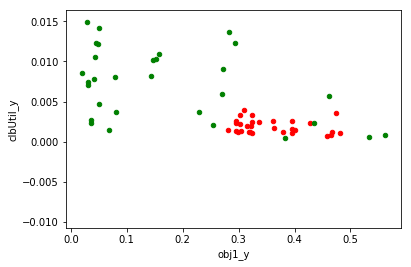

In [47]:
ax1 = sobel_sample.plot(kind='scatter', x='obj1_x', y='clbUtil_x',color='r')
ax2 = sobel_sample.plot(kind='scatter', x='obj1_y', y='clbUtil_y',color='g', ax=ax1)

(0, 1)

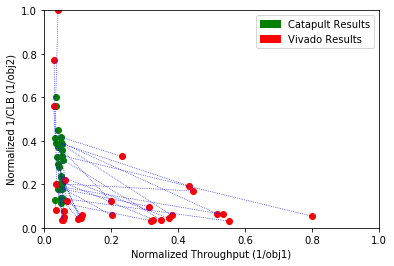

In [48]:
plt.scatter(y=sobel_sample['1/obj2_x'], x=sobel_sample.throughput_x, c='g')
plt.scatter(y=sobel_sample['1/obj2_y'], x=sobel_sample.throughput_y, c='r')
linex = []
for index, row in sobel_sample.iterrows():
    plt.plot([row['throughput_x'], row['throughput_y']], [row['1/obj2_x'], row['1/obj2_y']],'b:',linewidth=0.7)

red_data = mpatches.Patch(color='green', label='Catapult Results')
green_data = mpatches.Patch(color='red', label='Vivado Results')
plt.legend(handles=[red_data, green_data])
plt.xlabel('Normalized Throughput (1/obj1)')
plt.ylabel('Normalized 1/CLB (1/obj2)')
plt.ylim(0, 1)
plt.xlim(0, 1)

Text(0, 0.5, 'CLB Resource Utilization')

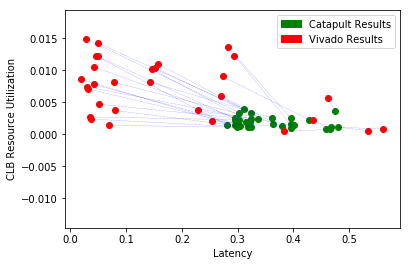

In [49]:
plt.scatter(y=sobel_sample.clbUtil_x, x=sobel_sample.obj1_x, c='g')
plt.scatter(y=sobel_sample.clbUtil_y, x=sobel_sample.obj1_y, c='r')
linex = []
for index, row in sobel_sample.iterrows():
    plt.plot([row['obj1_x'], row['obj1_y']], [row['clbUtil_x'], row['clbUtil_y']],'b:',linewidth=0.3)

red_data = mpatches.Patch(color='green', label='Catapult Results')
green_data = mpatches.Patch(color='red', label='Vivado Results')
plt.legend(handles=[red_data, green_data])
plt.xlabel('Latency')
plt.ylabel('CLB Resource Utilization')

(0, 0.003)

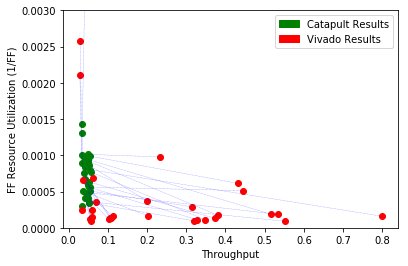

In [50]:
plt.scatter(y=sobel_sample.lut_inv_x, x=sobel_sample.throughput_x, c='g')
plt.scatter(y=sobel_sample.lut_inv_y, x=sobel_sample.throughput_y, c='r')
linex = []
for index, row in sobel_sample.iterrows():
    plt.plot([row['throughput_x'], row['throughput_y']], [row['lut_inv_x'], row['lut_inv_y']],'b:',linewidth=0.3)

red_data = mpatches.Patch(color='green', label='Catapult Results')
green_data = mpatches.Patch(color='red', label='Vivado Results')
plt.legend(handles=[red_data, green_data])
plt.xlabel('Throughput')
plt.ylabel('FF Resource Utilization (1/FF)')
plt.ylim(0, 0.003)

In [51]:
print("~~~~~~~~~~~ Catapult Averages ~~~~~~~~~~~~\n")
print(csobelx.mean())
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print("\n~~~~~~~~~~~ Vivado Averages ~~~~~~~~~~~~\n")
print(vsobelx.mean())
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")

~~~~~~~~~~~ Catapult Averages ~~~~~~~~~~~~

knob_unroll_factor         4.500000
knob_subdim_x             10.500000
obj1                       0.355435
obj2                     428.281250
lut                     2546.202083
ff                       348.614583
dsp                        1.000000
bram                       0.000000
throughput                 0.046515
ff_inv                     0.003005
lut_inv                    0.000544
1/obj2                     0.221897
clbUtil                    0.002898
mem_partition_size    496454.400000
dtype: float64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

~~~~~~~~~~~ Vivado Averages ~~~~~~~~~~~~

knob_unroll_factor         4.513725
knob_subdim_x             10.537255
obj1                       0.177451
obj2                    1241.309804
lut                     6274.917647
ff                      4218.830065
dsp                       52.670588
bram                       0.163399
throughput                 0.262821
ff_inv                     

In [52]:
print("~~~~~~~~~~~ Catapult Medians ~~~~~~~~~~~~\n")
print(csobelx.median())
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print("\n~~~~~~~~~~~ Vivado Medians ~~~~~~~~~~~~\n")
print(vsobelx.median())
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")

~~~~~~~~~~~ Catapult Medians ~~~~~~~~~~~~

knob_unroll_factor         4.500000
knob_subdim_x              6.000000
obj1                       0.334700
obj2                     366.500000
lut                     2058.000000
ff                       339.000000
dsp                        1.000000
bram                       0.000000
throughput                 0.047804
ff_inv                     0.002950
lut_inv                    0.000486
1/obj2                     0.185539
clbUtil                    0.002480
mem_partition_size    233280.000000
dtype: float64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

~~~~~~~~~~~ Vivado Medians ~~~~~~~~~~~~

knob_unroll_factor         5.000000
knob_subdim_x              8.000000
obj1                       0.082000
obj2                    1097.000000
lut                     5523.000000
ff                      4027.000000
dsp                       48.000000
bram                       0.000000
throughput                 0.195122
ff_inv                     0.